In [25]:
import osmnx as ox
import networkx as nx
import pyswarms as ps
import folium
from haversine import haversine

In [33]:
# define the fitness function for the PSO algorithm using Haversine distance
def fitness_function(x, graph, start_node, end_node):
    path = [start_node]
    for i in range(len(x)):
        next_node = graph.nodes()[i] if x[i] else None
        if next_node is not None:
            try:
                nx.shortest_path_length(graph, path[-1], next_node, weight='length')
                path.append(next_node)
            except nx.NetworkXNoPath:
                return float('inf')
    path.append(end_node)
    coords = [graph.nodes[node]['x_y'] for node in path]
    distance = sum([haversine(coords[i], coords[i+1]) for i in range(len(coords)-1)])
    return distance

In [34]:
# define the PSO algorithm for map path routing using Haversine distance
def pso_map_path_routing(graph, start_node, end_node, num_particles=50, max_iterations=100, w=0.5, c1=0.8, c2=0.9):
    # define the options for the PSO algorithm
    options = {'c1': c1, 'c2': c2, 'w': w}
    
    # create the PSO optimizer and run the algorithm
    optimizer = ps.discrete.BinaryPSO(n_particles=num_particles, dimensions=len(graph.nodes()), options=options)
    cost, pos = optimizer.optimize(lambda x: fitness_function(x, graph, start_node, end_node), max_iter=max_iterations)
    
    # convert the binary position to a list of nodes and return the path
    path = [start_node] + [graph.nodes()[i] for i in range(len(pos)) if pos[i]] + [end_node]
    return path

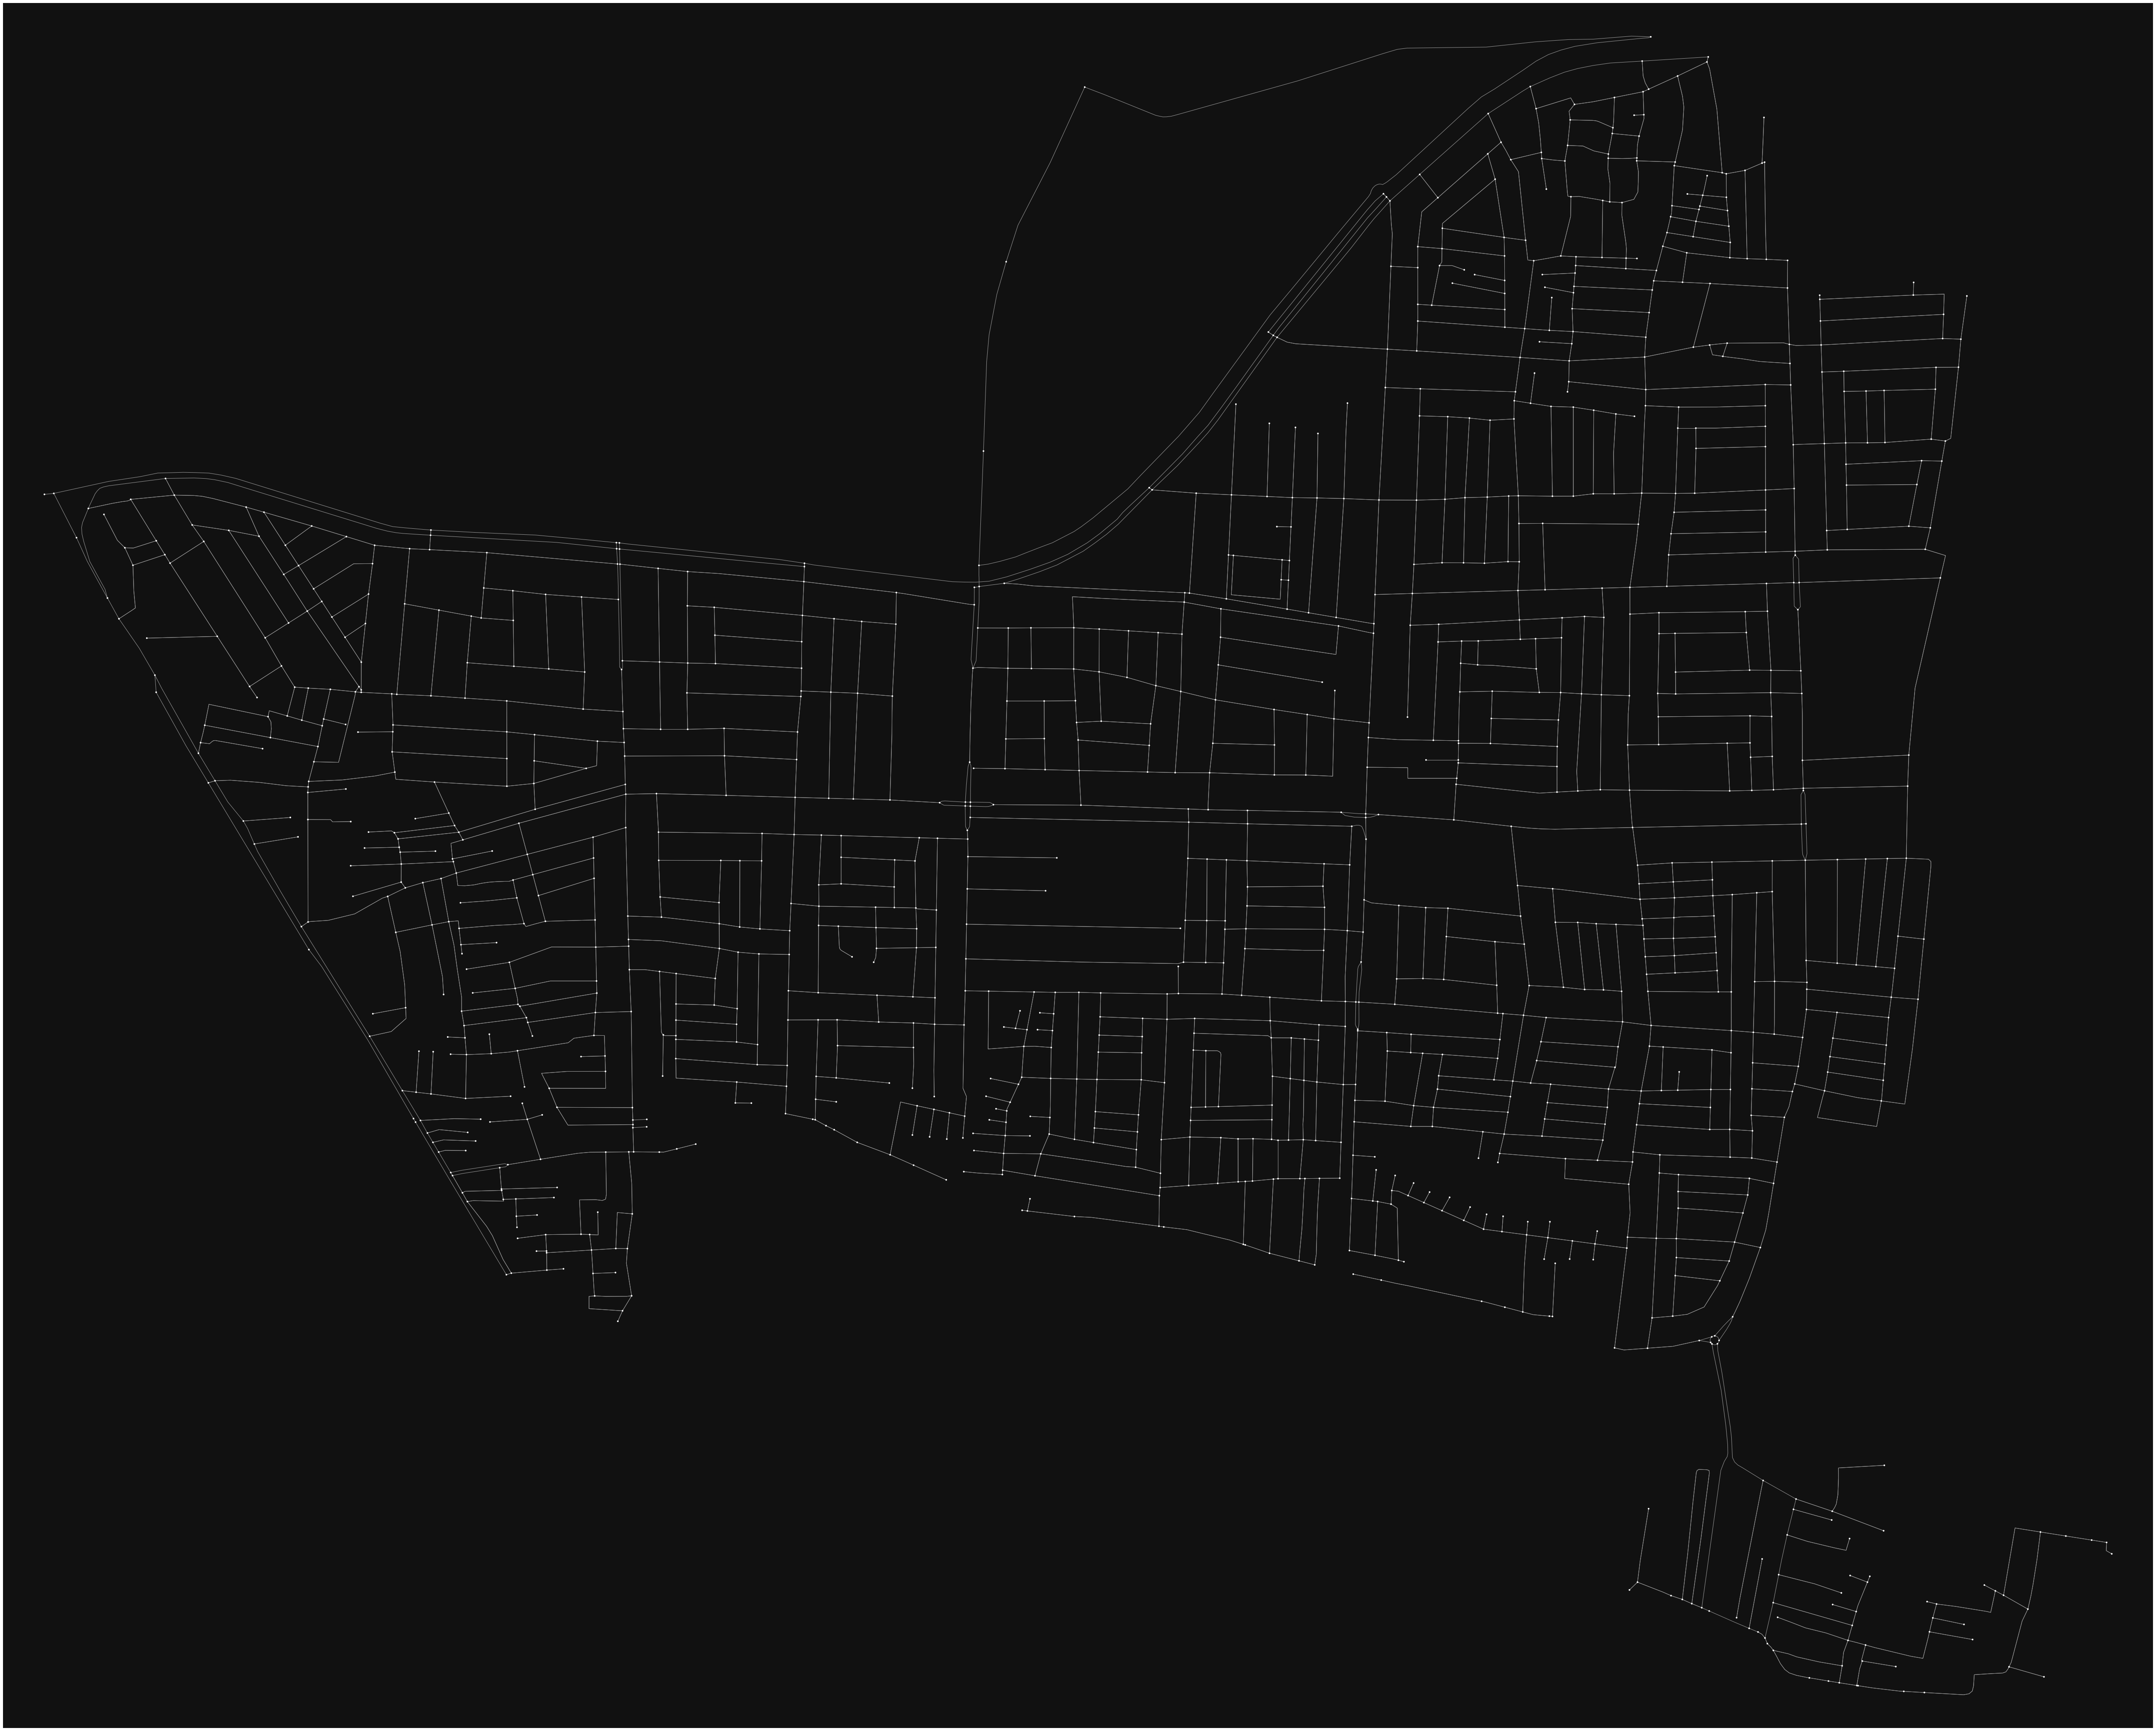

(<Figure size 6480x6480 with 1 Axes>, <AxesSubplot:>)

In [18]:
G = ox.graph_from_place("HSR, Bangalore, India", network_type='drive')
ox.plot_graph(G, figsize=(90,90))

In [23]:
source = (12.903165, 77.648635)
destination = (12.912123, 77.644624)
start_node = ox.distance.nearest_nodes(G, source[0], source[1])
end_node = ox.distance.nearest_nodes(G, destination[0], destination[1])

In [36]:
path = pso_map_path_routing(G, start_node, end_node, num_particles=50, max_iterations=100, w=0.5, c1=0.8, c2=0.9)


KeyError: 'k'